In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-price-prediction/Medical_insurance.csv


In [2]:
#importing necessary libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures

In [3]:
#reading the file and saving in dataframe
data=pd.read_csv('/kaggle/input/medical-insurance-price-prediction/Medical_insurance.csv')

In [4]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
#mapping the catagorical columns to numeric values
data['sex_map'] = data['sex'].map({'female': 1, 'male': 2})
data['smoker_map'] = data['smoker'].map({'yes': 1, 'no': 2})
data['region_map'] = data['region'].map({'northwest':1, 'northeast':2, 'southwest':3, 'southeast':4})


In [9]:
#validation of the change
print(data['smoker'].head()) 
print(data['smoker_map'].head())

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object
0    1
1    2
2    2
3    2
4    2
Name: smoker_map, dtype: int64


In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_map,smoker_map,region_map
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,3
1,18,male,33.770,1,no,southeast,1725.55230,2,2,4
2,28,male,33.000,3,no,southeast,4449.46200,2,2,4
3,33,male,22.705,0,no,northwest,21984.47061,2,2,1
4,32,male,28.880,0,no,northwest,3866.85520,2,2,1


In [11]:
#checking null and missing values
#data.replace(['', 'N/A', 'Unknown', -1], pd.NA, inplace=True)
print(data.isnull().sum())
# Option 2: Fill missing values with appropriate values (mean, median, etc.)
'''data['Age'].fillna(data['Age'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)
data['Charges'].fillna(data['Charges'].median(), inplace=True)'''

age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
sex_map       0
smoker_map    0
region_map    0
dtype: int64


"data['Age'].fillna(data['Age'].median(), inplace=True)\ndata['BMI'].fillna(data['BMI'].median(), inplace=True)\ndata['Charges'].fillna(data['Charges'].median(), inplace=True)"

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


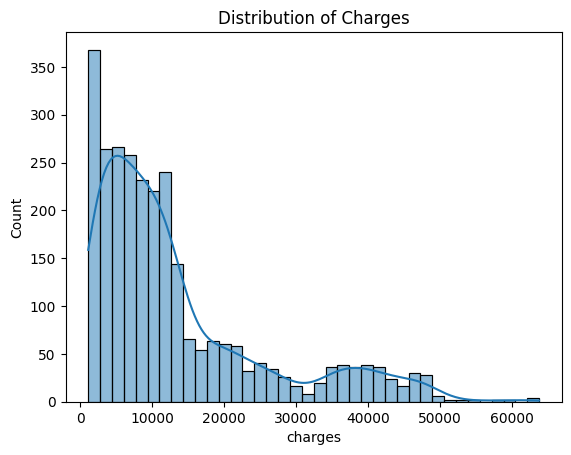

In [12]:
# Distribution of charges
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

In [13]:
#after mapping the categorical columns,to avoid data type error we can drop the original columns and have the mapped ones
data.drop(['sex','region','smoker'],inplace=True,axis=1)
data.head()


,age,bmi,children,charges,sex_map,smoker_map,region_map
0,19,27.900,0,16884.92400,1,1,3
1,18,33.770,1,1725.55230,2,2,4
2,28,33.000,3,4449.46200,2,2,4
3,33,22.705,0,21984.47061,2,2,1
4,32,28.880,0,3866.85520,2,2,1


In [14]:
#checking the data types
data.dtypes

age             int64
bmi           float64
children        int64
charges       float64
sex_map         int64
smoker_map      int64
region_map      int64
dtype: object

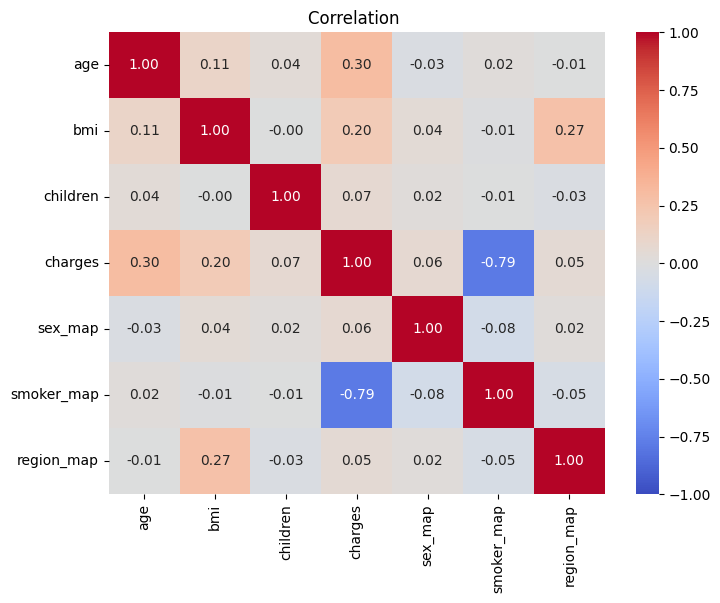

In [15]:
x=data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(x, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation ')
plt.show()

In [16]:
#from the heat map or from the attributes below we can find the strong correlation with charges(range 1,-1)
print(x['charges'])

age           0.298624
bmi           0.199846
children      0.066442
charges       1.000000
sex_map       0.062837
smoker_map   -0.788783
region_map    0.054058
Name: charges, dtype: float64


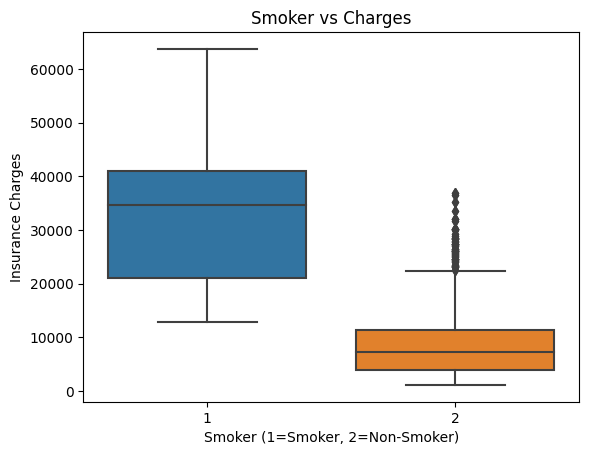

In [17]:
#from the heat map and the attribute we see strong correlation with smoker_map we can visualized
sns.boxplot(x='smoker_map', y='charges', data=data)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker (1=Smoker, 2=Non-Smoker)')
plt.ylabel('Insurance Charges')
plt.show()

In [18]:
#single variable linear regression for predicting charges
from sklearn.metrics import mean_squared_error, r2_score
lre=LinearRegression()
a=data.drop('charges',axis=1)#all the data except charges
y=data['charges'] #the predict variable (target)
a_train,a_test,y_train,y_test=train_test_split(a,y,test_size=0.20,random_state=1)#split method
#single variable /lets try smoker_map as it has strong corr/initail and train 
lre.fit(a_train[['age']],y_train)
#now lets predict the single variable
y_pred=lre.predict(a_test[['age']])
#to evaluate the model we check MSR and R^2
mse=mean_squared_error(y_test,y_pred)
rsquare=r2_score(y_test,y_pred)
print("mse :",mse,", r^2 :",rsquare)


mse : 123826117.5063096 , r^2 : 0.06040235835447472


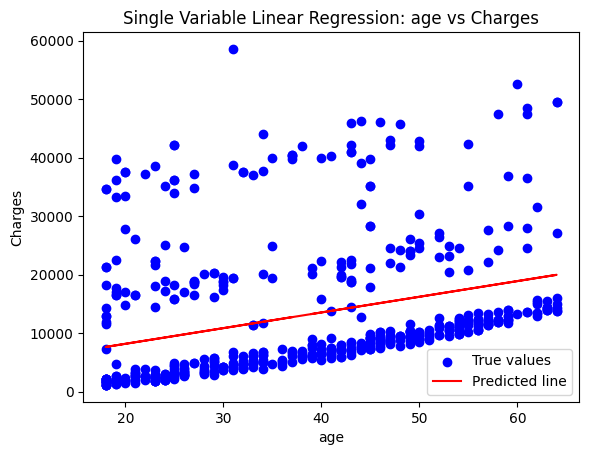

In [19]:
#visualise the single var linear
plt.scatter(a_test[['age']], y_test, color='blue', label='True values')
plt.plot(a_test[['age']], y_pred, color='red', label='Predicted line')
plt.title('Single Variable Linear Regression: age vs Charges')
plt.xlabel('age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [20]:
#lets develop a model for multiple variable to predict charges
a_train_multi=a_train[['age', 'bmi', 'children' , 'sex_map', 'smoker_map', 'region_map']]
a_test_multi=a_test[['age', 'bmi', 'children' , 'sex_map', 'smoker_map', 'region_map']]
lre.fit(a_train_multi,y_train)#fitting and training the model
y_pred_multi=lre.predict(a_test_multi)#predicting the multi train variable
mse_multi=mean_squared_error(y_test,y_pred_multi)#evaluate and finding mse
rsquare_multi=r2_score(y_test,y_pred_multi)#evaluate and finding r2
print("mse_multi :",mse_multi ," , r^2 :",rsquare_multi)

mse_multi : 42691023.575854465  , r^2 : 0.676058767898764


In [21]:
#Use Ridge regression to refine the performance of Linear regression models.
rige_model=Ridge(alpha=1)
rige_model.fit(a_train_multi,y_train)
y_rige_pred=rige_model.predict(a_test_multi)
mse_rige=mean_squared_error(y_test,y_rige_pred)
rsquare_rige=r2_score(y_test,y_rige_pred)
print("mse_multi_ridge :",mse_rige ," , r^2_rige :",rsquare_rige)

mse_multi_ridge : 42662700.46891405  , r^2_rige : 0.6762736847920755


In [22]:
#lets develop a model for multiple variable to predict charges by age and smoker
a_train_du=a_train[['age', 'smoker_map']]
a_test_du=a_test[['age','smoker_map']]
lre.fit(a_train_du,y_train)#fitting and training the model
y_pred_du=lre.predict(a_test_du)#predicting the multi train variable
mse_du=mean_squared_error(y_test,y_pred_du)#evaluate and finding mse
rsquare_du=r2_score(y_test,y_pred_du)#evaluate and finding r2
print("mse_du :",mse_du ," , r^2 :",rsquare_du)

mse_du : 46098864.39493237  , r^2 : 0.6501999324511791


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


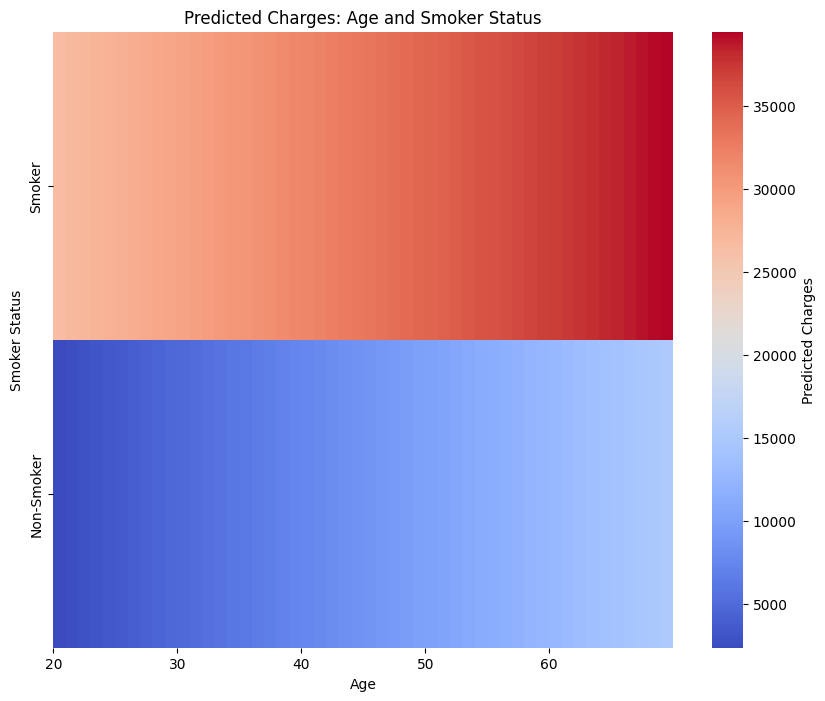

In [23]:
# Create a grid for age and smoker_map
age_range = np.linspace(a_test_du['age'].min(), a_test_du['age'].max(), 50)
smoker_range = [1, 2]  # Smoker and Non-Smoker
age_grid, smoker_grid = np.meshgrid(age_range, smoker_range)

# Predict charges for the grid
charges_pred_grid = lre.predict(np.column_stack((age_grid.ravel(), smoker_grid.ravel())))
charges_pred_grid = charges_pred_grid.reshape(age_grid.shape)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    charges_pred_grid,
    xticklabels=10,  # Automatically reduce the number of tick labels for readability
    yticklabels=['Smoker', 'Non-Smoker'],
    cmap='coolwarm',
    cbar_kws={'label': 'Predicted Charges'}
)

# Customize the x-ticks to show specific intervals
tick_positions = np.linspace(0, len(age_range) - 1, len(age_range))[::10]  # Every 10th position
tick_labels = np.round(age_range[::10], -1).astype(int)  # Round to nearest 10 (e.g., 20, 30, 40)
plt.xticks(tick_positions, tick_labels)  # Apply new ticks

plt.title('Predicted Charges: Age and Smoker Status')
plt.xlabel('Age')
plt.ylabel('Smoker Status')
plt.show()